In [1]:
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import pingouin as pg
import numpy as np  
import matplotlib.patches as mpatches

C:\Users\essie-adm-qizhu\AppData\Roaming\Python\Python38\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


### sample entropy velocity 


In [ ]:
def TwoGroupBoxPlot(g1,g2,t,yt,ymax,ymin,s4,seg=3,s_tx_h=0.5,lh=1,ll=2.5,figsize=(8,8),Hmax=0):   
    all_data = [g1,g2]
    labels = ['Human-Like', 'Traditional',]

    fig, (ax1)= plt.subplots(nrows=1, ncols=1, figsize=figsize)
    size_ax = 16
    size_title = 20
    size_group = 14

    # rectangular box plot
    bplot1 = ax1.boxplot(all_data,
                        vert=True,  # vertical box alignment
                        patch_artist=True,  # fill with color
                        labels=labels,
                        widths = 0.3,
                        # positions = [1,4,7,10],
                        showfliers=False, ### ignore outliners
                        )  # will be used to label x-ticks
    ax1.set_title(t,fontsize=size_title)


    colors = [(255/255,178/255,102/255, 1), (102/255, 178/255, 255/255, 1)]
   
    for patch, color in zip(bplot1['boxes'], colors):
        # change outline color
        patch.set(color='w', linewidth=1)
        # change fill color
        patch.set(facecolor =color)

    # adding horizontal grid lines
    ax1.yaxis.grid(True)
    ax1.set_ylim([ymin,ymax])
    ax1.set_xlabel("Conditions",fontsize=size_ax)
    ax1.set_ylabel(yt,fontsize=size_ax)
    # ax1.set_xticks(np.arange(4))
    ax1.set_xticklabels(['Human-Like', 'Traditional',],
    ha ='center',
    fontsize=size_group
    )

    ## plot significant level
    max = Hmax


    if(s4):
        x1 =1
        x2 = 2
        y, h, col = max,s_tx_h, 'k'
        plt.plot([x1,  x2], [y,  y], lw=1, c=col)
        plt.text((x1+x2)*.5, y+h, s4, ha='center', va='bottom', color=col)



    plt.show()

In [20]:
### read data from csv 
entropy = './Entropy/Total_entropy.csv'
df_raw = pd.read_csv(entropy)
print(df_raw)


     marker  entropy_pos_X  entropy_vel_X  mean_vel_X  entropy_pos_Y  \
0         0       0.009716       0.235347   -0.000616       0.013878   
1         1       0.009511       0.115280   -0.000700       0.007882   
2         2       0.017921       0.249274   -0.001219       0.025650   
3         3       0.017059       0.199249   -0.001208       0.029427   
4         4       0.016004       0.250192   -0.001182       0.019065   
..      ...            ...            ...         ...            ...   
315      15       0.015539       0.185483    0.000554       0.029714   
316      16       0.018429       0.277813    0.000468       0.040322   
317      17       0.020788       0.222904    0.000644       0.038093   
318      18       0.014486       0.204804    0.000396       0.050602   
319      19       0.020614       0.252492    0.000548       0.035319   

     entropy_vel_Y    mean_vel_Y  entropy_pos_Z  entropy_vel_Z  mean_vel_Z  \
0         0.244757 -2.203470e-04       0.024146       0.2

In [81]:
metrix = 'entropy_vel_Y'

h = df_raw[df_raw['Groups']=='human_like']
t = df_raw[df_raw['Groups']=='traditional']
hs = h[metrix]
ts = t[metrix]


pg.rm_anova(dv=metrix, within='Groups', subject='subjects',
                   data=df_raw).round(3)

,Source,ddof1,ddof2,F,p-unc,np2,eps
0,Groups,1,15,3.386,0.086,0.184,1.0


In [72]:
# pg.wilcoxon(x=hs,y=ts)

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,4069.0,two-sided,0.000054,-0.368168,0.401211


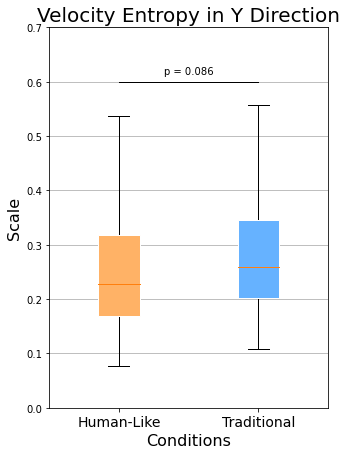

In [86]:

TwoGroupBoxPlot(hs,ts,
t = 'Velocity Entropy in Y Direction',
yt ="Scale",
figsize=(5,7),
ymax =0.7,ymin=0,
s4 ='p = 0.086', # h-a
ll=3,
s_tx_h=0.01,
seg =2,
Hmax= 0.6
)